In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import model_based_agent as mba
import utils as ut
import ensemble_mod_env as eme

In [42]:
def load_data(folder,iters_completed):
    # Loads data while things are still running. To check up on progress
    trajs = []
    evals,mods = [],[]
    for i in range(iters_completed):
        with open(folder+f'collect{i}.pkl','rb') as f:
            trajs.append(pickle.load(f))
        for j in range(3):
            evals.append([[] for _ in range(3)])
            mods.append([[] for _ in range(3)])
            with open(folder+f'eval{i}_{j}.pkl','rb') as f:
                evals[i][j] = pickle.load(f)
            with open(folder+f'mod{i}_{j}.pkl','rb') as f:
                mods[i][j] = pickle.load(f)
    return trajs,evals,mods

def print_rewards(evals,trajs,ind,lp_vec=[1/2,1/3,1/4]):
    print('Evaluation rewards:')
    for i in range(3):
        print('\tLP_frac',np.round(lp_vec[i],2),': ',np.round(np.mean(evals[ind][i]['reward']),2))
    print('Random trajectory reward:')
    print('\t',np.round(np.mean(trajs[ind]['reward']),2))

def plot_mods(models,vmin=None,vmax=None):
    fig,ax = plt.subplots(len(models),7)
    fig.set_size_inches((15,2*len(models)))
    for m,mod in enumerate(models):
        for i,(key,item) in enumerate(mod.items()):
            if i<4:
                img = ax[m,i].imshow(item[:,:,0],vmin=-180,vmax=180)
            else:
                img = ax[m,i].imshow(item[:,:,0],vmin=vmin,vmax=vmax)
            fig.colorbar(img,ax=ax[m,i])
            ax[m,i].axis('off')
            if m==0:
                ax[m,i].set_title(f'{len(models)} models: {key}')
        ax[m,6].imshow(np.sign(mod['reward_on']-mod['reward_off'])[:,:,0],vmin=-1,vmax=1)

In [3]:
trajs,evals,mods = load_data('Data/Run15-01-16-24/', 3)

In [96]:
print_rewards(evals,trajs,0)

Evaluation rewards:
	LP_frac 0.5 :  -0.17
	LP_frac 0.33 :  0.07
	LP_frac 0.25 :  -0.4
Random trajectory reward:
	 -0.11


In [100]:
print_rewards(evals,trajs,2)

Evaluation rewards:
	LP_frac 0.5 :  0.02
	LP_frac 0.33 :  0.01
	LP_frac 0.25 :  0.0
Random trajectory reward:
	 0.03


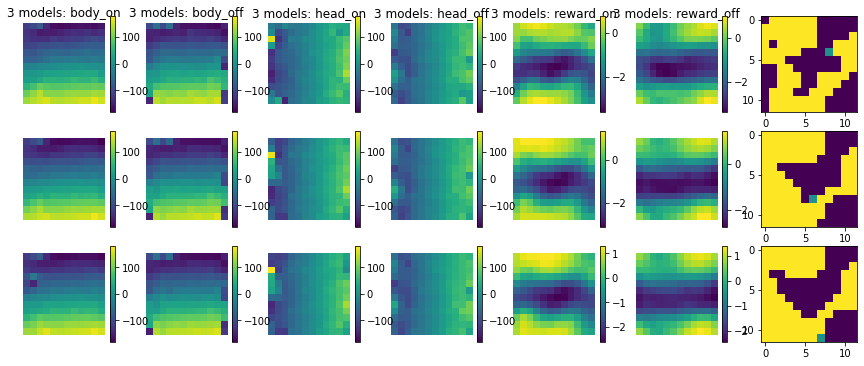

In [101]:
mods_plt = [mods[0][0],mods[1][0],mods[2][0]]
plot_mods(mods_plt)

In [8]:
trajs[2].keys()

dict_keys(['loc', 't', 'endpts', 'obs', 'reward', 'target', 'action'])

In [5]:
obs = np.zeros((len(trajs[2]['obs']),2))
locs = np.zeros((len(trajs[2]['loc']),2))
for i,ob in enumerate(trajs[2]['obs']):
    obs[i,:] = ob*180
    locs[i,:] = trajs[2]['loc'][i]
obs.shape

(3367, 2)

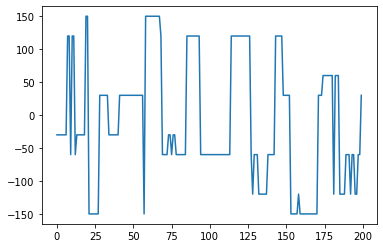

In [20]:
plt.plot(obs[:200,0])

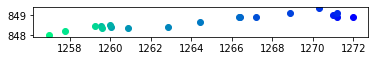

In [19]:
NPOINTS = 20
fig,ax = plt.subplots(1)

ax.set_prop_cycle('color',plt.cm.winter(np.linspace(0,1,NPOINTS)))
for i in range(NPOINTS-1):
    img = ax.scatter(locs[i,0],locs[i,1])
    ax.set_aspect('equal','box')

In [7]:
dh = mba.DataHandler()
dh.load_df('./Data/Run15-01-16-24/totaldf.pkl')

In [11]:
dh.df.columns

Index(['t', 'obs_b', 'obs_h', 'prev_actions', 'next_obs_b', 'next_obs_h',
       'reward', 'loc'],
      dtype='object')

In [12]:
locs = np.zeros((len(dh.df),2))
obs = np.zeros((len(dh.df),2))
for i,loc in enumerate(dh.df['loc']):
    locs[i,:] = loc
    obs[i,:] = dh.df['obs_b']

## HT check looking

In [33]:
fold = './Data/HTDeb19-01-15-06/'
dfs = []
for i in range(2):
    fname = fold+f'collect{i}.pkl'
    with open(fname,'rb') as f:
        
    angs,new_df = ut.make_df_HT(fname)
    dfs.append(new_df)
dfs = pd.concat(dfs)

C:\Users\ccli3\Documents\Research\20_09_07_NewPC\RLWorms\01_13_reals\utils.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['angs'][i] = np.flip(df['angs'][i])


In [40]:
dfs.to_pickle(fold+'alls.pkl')
params = {
    'reward_ahead': 10,
    'timestep_gap': 1,
    'prev_act_window': 3,
    'jump_limit': 100,
}
with open(fold+'alls_params.pkl','wb') as f:
    pickle.dump(params,f)

In [9]:
obs = np.array(traj['obs'])*180
locs = np.concatenate(df['loc'].to_numpy()).reshape(-1,2)

In [10]:
angs,new_df = ut.make_df_HT(fname)

C:\Users\ccli3\Documents\Research\20_09_07_NewPC\RLWorms\01_13_reals\utils.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['angs'][i] = np.flip(df['angs'][i])


In [11]:
obs_n = new_df['obs_b'].to_numpy()

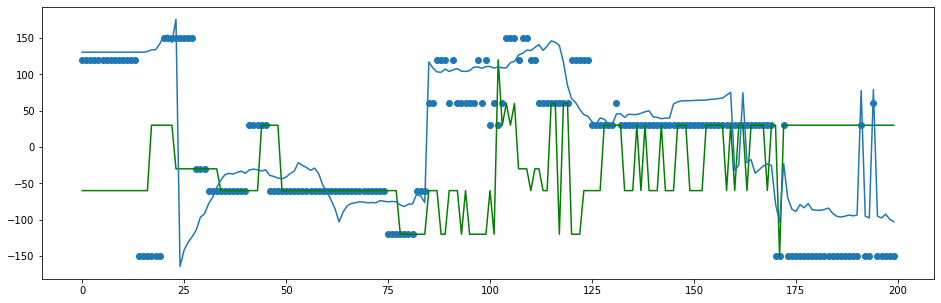

In [12]:
st = 0
lim = 200
plt.figure(figsize=(16,5))
plt.plot(obs[st:st+lim],'g')
plt.plot(angs[st:st+lim])
plt.scatter(range(lim),obs_n[st:st+lim])

In [41]:
dh = mba.DataHandler()
dh.load_df(fold+'alls.pkl')
mset = eme.ModelSet(1,frac=1)
mset.make_models(dh,sm_pars={'lambda':.1,'iters':10})

On model 0
Penalty 0.004078354995790789


#### 10 min of data

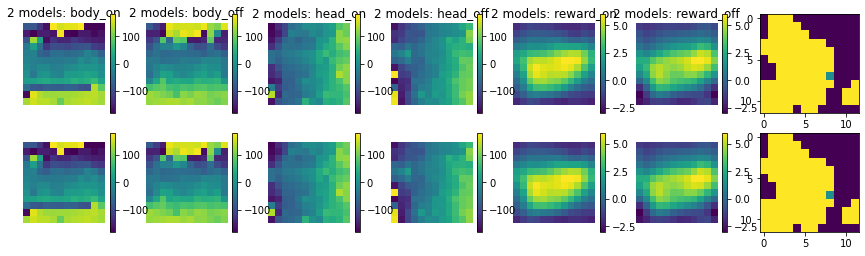

In [48]:
mods_plt = [mset.models[0],mset.models[0]]
plot_mods(mods_plt,vmin=-3,vmax=6)

In [52]:
df_t = pd.DataFrame(traj)

In [54]:
df_t[:20]

,loc,t,endpts,obs,reward,target,action,angs
0,"[698.0, 345.5]",0.375,"[[693, 698], [339, 352]]",-0.333333,-0.090909,180,1,"[150, 270]"
1,"[698.0833333333334, 346.0833333333333]",0.562,"[[693, 699], [340, 352]]",-0.333333,-0.083333,180,1,"[180, 300]"
2,"[698.2222222222222, 346.55555555555554]",0.734,"[[693, 699], [339, 354]]",-0.333333,-0.138889,180,1,"[180, 270]"
3,"[699.1, 348.1]",0.937,"[[693, 704], [340, 352]]",-0.333333,-0.877778,180,0,"[180, 0]"
4,"[698.0, 347.0]",1.140,"[[694, 704], [339, 352]]",-0.333333,1.100000,180,0,"[150, 0]"
5,"[698.4444444444445, 348.22222222222223]",1.328,"[[698, 704], [340, 353]]",-0.333333,-0.444444,180,0,"[90, 330]"
6,"[702.0, 352.0]",1.531,"[[698, 704], [341, 357]]",-0.333333,-3.555556,180,0,"[90, 270]"
7,"[702.4166666666666, 353.75]",1.718,"[[698, 703], [343, 359]]",-0.333333,-0.416667,180,0,"[90, 270]"
8,"[702.5, 355.2857142857143]",1.921,"[[698, 704], [343, 360]]",-0.333333,-0.083333,180,0,"[90, 270]"
9,"[702.4545454545455, 355.3636363636364]",2.109,"[[698, 702], [343, 360]]",-0.333333,0.045455,180,0,"[90, 270]"


In [56]:
dh.df[]

,t,obs_b,angs,prev_actions,reward,loc,target,obs_h,next_obs_b,next_obs_h
0,0.937,150,"[240, 90]",0,-6.948107,"[1015.1904761904761, 780.0793650793651]",90,0.0,120.0,60.0
1,1.109,120,"[270, 90]",0,-6.723665,"[1013.4918032786886, 781.3770491803278]",90,60.0,120.0,60.0
2,1.296,120,"[270, 90]",0,-5.840342,"[1012.950819672131, 782.0491803278688]",90,60.0,120.0,60.0
3,1.468,120,"[270, 90]",0,-5.567258,"[1012.3389830508474, 782.6610169491526]",90,60.0,150.0,-30.0
4,1.656,150,"[210, 60]",1,-5.552316,"[1010.8833333333334, 783.7166666666667]",90,-30.0,150.0,-60.0
...,...,...,...,...,...,...,...,...,...,...
1231,297.718,-150,"[210, 180]",0,0.118938,"[625.3157894736842, 447.7105263157895]",180,-180.0,-150.0,0.0
1232,297.906,-150,"[30, 180]",0,0.407242,"[626.3947368421052, 447.07894736842104]",180,0.0,-150.0,150.0
1233,298.125,-150,"[180, 0]",0,1.486190,"[702.0379746835443, 462.37974683544303]",180,150.0,-150.0,0.0
1234,298.312,-150,"[30, 180]",0,1.645281,"[624.775, 447.725]",180,0.0,-150.0,0.0
